In [1]:
! pip install nltk
! pip install pandas openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)


In [3]:
pip install dask

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import dask.array as da
import warnings
warnings.filterwarnings("ignore")

# Load the data

In [31]:
import pandas as pd
# Local directory
train_data = pd.read_csv("D:\\GUVI AI & ML\\Capstoneproject4-Classifying Cybersecurity Incidents with Machine Learning\\data\\GUIDE_Train.csv")

In [32]:
train_data.shape

(9516837, 45)

In [33]:
train_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [35]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,9516837.0,8.425494e+11,4.962499e+11,0.0,4.123169e+11,8.418136e+11,1.271310e+12,1.709397e+12
OrgId,9516837.0,1.815800e+02,3.867784e+02,0.0,1.000000e+01,4.500000e+01,1.710000e+02,6.147000e+03
IncidentId,9516837.0,7.066349e+04,1.208369e+05,0.0,5.040000e+02,1.033600e+04,8.432900e+04,5.997060e+05
AlertId,9516837.0,4.065188e+05,4.592827e+05,0.0,2.324200e+04,2.166520e+05,6.715770e+05,1.721456e+06
DetectorId,9516837.0,1.106724e+02,4.351038e+02,0.0,2.000000e+00,9.000000e+00,4.500000e+01,9.522000e+03
AlertTitle,9516837.0,2.947315e+03,1.146150e+04,0.0,2.000000e+00,1.100000e+01,1.800000e+02,1.131740e+05
DeviceId,9516837.0,9.566476e+04,1.635288e+04,0.0,9.879900e+04,9.879900e+04,9.879900e+04,9.879900e+04
Sha256,9516837.0,1.287191e+05,3.399208e+04,0.0,1.382680e+05,1.382680e+05,1.382680e+05,1.382680e+05
IpAddress,9516837.0,2.857506e+05,1.412240e+05,0.0,3.606060e+05,3.606060e+05,3.606060e+05,3.606060e+05
Url,9516837.0,1.503317e+05,3.750795e+04,0.0,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05


In [36]:
import pandas as pd
# Local directory
test_data = pd.read_csv("D:\\GUVI AI & ML\\Capstoneproject4-Classifying Cybersecurity Incidents with Machine Learning\\data\\GUIDE_Test.csv")

In [37]:
test_data.shape

(4147992, 46)

In [38]:
test_data.head(10)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
5,670014899930,0,238,378946,2024-06-06T08:10:50.000Z,0,0,InitialAccess,T1078;T1078.004,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
6,1194000913330,133,105333,732769,2024-06-15T04:06:55.000Z,3,4,SuspiciousActivity,NaN,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
7,678604832796,6,2461,1523,2024-05-26T11:48:38.000Z,17,1265,Impact,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
8,618475292265,7,5177,1815,2024-05-25T17:57:20.000Z,21,528,Impact,NaN,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
9,438086667998,100,7060,9787,2024-06-02T05:46:22.000Z,72,53,Impact,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [40]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,4147992.0,8.462250e+11,4.923351e+11,1.0,4.209068e+11,8.418136e+11,1.271310e+12,1.709397e+12
OrgId,4147992.0,1.756698e+02,3.708729e+02,0.0,8.000000e+00,4.300000e+01,1.730000e+02,6.138000e+03
IncidentId,4147992.0,6.780345e+04,1.178736e+05,3.0,4.110000e+02,8.818000e+03,7.944000e+04,5.997000e+05
AlertId,4147992.0,4.072191e+05,4.550578e+05,0.0,2.365900e+04,2.228970e+05,6.711010e+05,1.721457e+06
DetectorId,4147992.0,1.008391e+02,4.082934e+02,0.0,2.000000e+00,7.000000e+00,3.900000e+01,9.520000e+03
AlertTitle,4147992.0,2.529514e+03,1.044138e+04,0.0,2.000000e+00,9.000000e+00,1.160000e+02,1.131690e+05
DeviceId,4147992.0,9.575061e+04,1.615628e+04,0.0,9.879900e+04,9.879900e+04,9.879900e+04,9.879900e+04
Sha256,4147992.0,1.283939e+05,3.457595e+04,0.0,1.382680e+05,1.382680e+05,1.382680e+05,1.382680e+05
IpAddress,4147992.0,2.873898e+05,1.400920e+05,0.0,3.606060e+05,3.606060e+05,3.606060e+05,3.606060e+05
Url,4147992.0,1.504279e+05,3.734754e+04,0.0,1.603960e+05,1.603960e+05,1.603960e+05,1.603960e+05


# Exploratory Data Analysis

In [41]:
# Checking Missing values in the train Data Set and printing the Percentage for Missing Values for Each Columns

count = train_data.isnull().sum().sort_values(ascending=False)
percentage = ((train_data.isnull().sum()/len(train_data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
ResourceType,9509762,99.925658
ActionGrouped,9460773,99.410897
ActionGranular,9460773,99.410897
ThreatFamily,9441956,99.213173
EmailClusterId,9420025,98.982729
AntispamDirection,9339535,98.136965
Roles,9298686,97.707736
SuspicionLevel,8072708,84.825536
LastVerdict,7282572,76.523030
MitreTechniques,5468386,57.460120


In [42]:
#Checking Missing values in the test Data Set and printing the Percentage for Missing Values for Each Columns

count = test_data.isnull().sum().sort_values(ascending=False)
percentage = ((test_data.isnull().sum()/len(test_data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
ActionGrouped,4146079,99.953881
ActionGranular,4146079,99.953881
ResourceType,4144998,99.927820
ThreatFamily,4116614,99.243538
EmailClusterId,4106285,98.994526
AntispamDirection,4071481,98.155469
Roles,4039317,97.380058
SuspicionLevel,3498157,84.333745
LastVerdict,3155260,76.067167
MitreTechniques,2307104,55.619779


Percentage for default

IncidentGrade
BenignPositive    43.43
TruePositive      35.10
FalsePositive     21.47
Name: proportion, dtype: float64


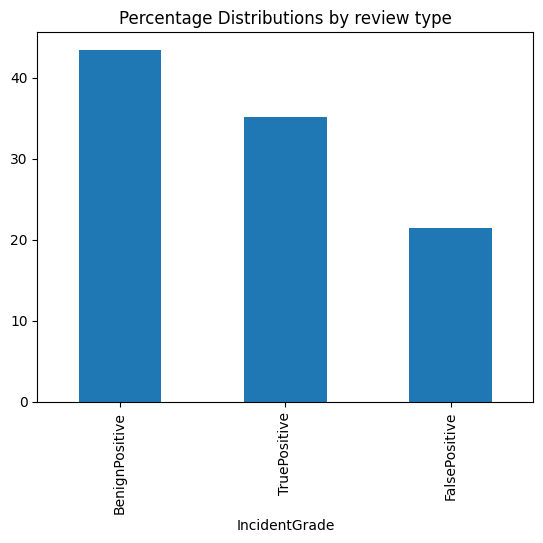

In [43]:
# Check for the Distribution in train_data
import matplotlib.pyplot as plt

print('Percentage for default\n')
print(round(train_data.IncidentGrade.value_counts(normalize=True)*100,2))
round(train_data.IncidentGrade.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

Percentage for default

IncidentGrade
BenignPositive    42.26
TruePositive      35.98
FalsePositive     21.76
Name: proportion, dtype: float64


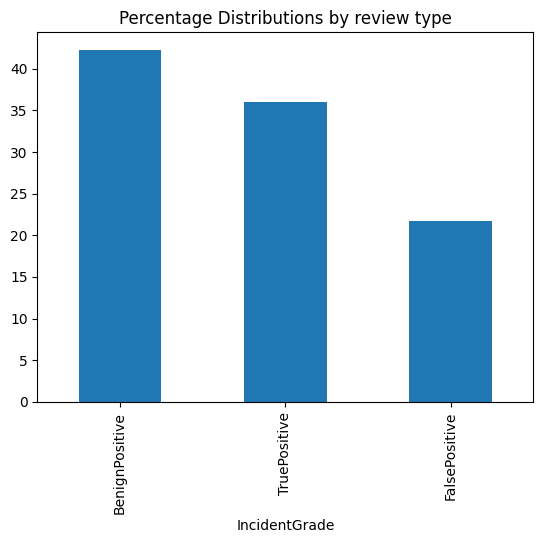

In [44]:
# Check for the Distribution in test_data
import matplotlib.pyplot as plt

print('Percentage for default\n')
print(round(test_data.IncidentGrade.value_counts(normalize=True)*100,2))
round(test_data.IncidentGrade.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

<Axes: >

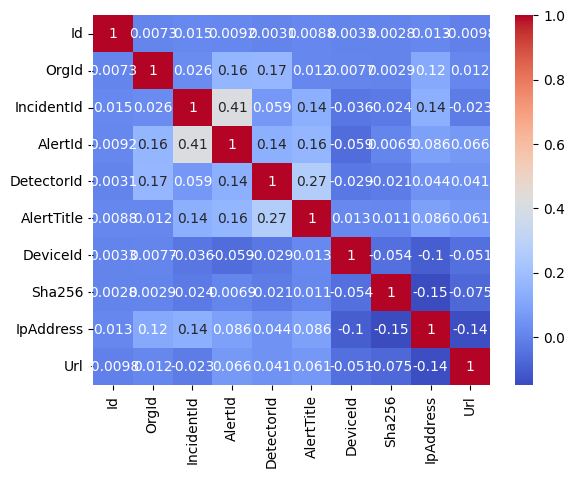

In [45]:
#correlation

import seaborn as sns
import pandas as pd

# DataFrame called 'train_data'
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Now calculate and plot the correlation heatmap
sns.heatmap(numeric_data.iloc[:, :10].corr(),cmap= 'coolwarm',annot=True)

# Handling Missing Data & encoding

In [46]:
train_data = train_data.sample(frac=0.002, random_state=42)
test_data = test_data.sample(frac=0.001, random_state=42)

In [47]:
test_data = test_data.drop(['Usage'], axis=1)

In [48]:
train_data = train_data.drop(['Id'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

In [49]:
train_data = train_data.drop(['MitreTechniques','ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'], axis=1)
test_data = test_data.drop(['MitreTechniques','ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'], axis=1)

In [50]:
train_data = train_data.drop(['AlertId','DeviceId', 'Url','AccountSid', 'AccountUpn', 'AccountObjectId','AccountName','NetworkMessageId', 'RegistryValueName','RegistryValueData','OAuthApplicationId', 'ResourceIdName' ], axis=1)
test_data = test_data.drop(['AlertId','DeviceId', 'Url','AccountSid', 'AccountUpn', 'AccountObjectId','AccountName','NetworkMessageId', 'RegistryValueName','RegistryValueData','OAuthApplicationId', 'ResourceIdName' ], axis=1)

In [51]:

train_data = train_data.dropna(subset=['IncidentGrade'])
test_data = test_data.dropna(subset=['IncidentGrade'])

In [52]:

train_data['Timestamp'] = train_data['Timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False)
train_data['Timestamp'] = dd.to_datetime(train_data['Timestamp'], format='%Y-%m-%d')

In [53]:
test_data['Timestamp'] = test_data['Timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False)
test_data['Timestamp'] = dd.to_datetime(test_data['Timestamp'], format='%Y-%m-%d')

In [54]:
train_data['Day_of_Week'] = train_data['Timestamp'].dt.day_name()
test_data['Day_of_Week'] = test_data['Timestamp'].dt.day_name()

In [55]:
train_x = train_data.drop('IncidentGrade', axis=1)
train_y = train_data['IncidentGrade']

In [56]:
test_x = test_data.drop('IncidentGrade', axis=1)
test_y = test_data['IncidentGrade']

In [57]:
for col in train_x.columns:
    if train_x[col].dtype == 'object' or train_x[col].dtype == 'string':
        train_x[col] = train_x[col].astype('category')

In [58]:
for col in test_x.columns:
    if test_x[col].dtype == 'object' or test_x[col].dtype == 'string':
        test_x[col] = test_x[col].astype('category')

In [59]:
categorical_features = test_x.select_dtypes(include=['category']).columns
categorical_features

Index(['Category', 'EntityType', 'EvidenceRole', 'Day_of_Week'], dtype='object')

In [60]:

train_x_cat = train_x.astype({col: 'category' for col in categorical_features})
test_x_cat = test_x.astype({col: 'category' for col in categorical_features})

In [61]:
! pip install dask-ml

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------ --------- 0.8/1.0 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/28.1 MB 5.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/28.1 MB 5.3 MB/s eta 0:00:05
   ---- ----------------------------------- 2.9/28.1 MB 5.2 MB/s eta 0:00:05
   ----- ---------------------------------- 3.9/28.1 MB 5.1 MB/s eta 0:00:05
   ------- -------------------------------- 5.0/28.1 MB 5.1 MB/s eta 0:00:05
   -------- ---------------

In [62]:
from dask_ml.preprocessing import DummyEncoder

encoder = DummyEncoder()
train_x = encoder.fit_transform(train_x_cat)
train_x.head()

,OrgId,IncidentId,Timestamp,DetectorId,AlertTitle,Sha256,IpAddress,DeviceName,RegistryKey,ApplicationId,...,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
8036545,64,49334,2024-06-11,10,8,138268,360606,153085,1631,2251,...,False,False,True,False,False,False,False,False,True,False
3828916,43,52272,2024-06-13,1,1,138268,360606,153085,1631,2251,...,False,False,True,False,False,False,False,True,False,False
4404679,2,21863,2024-06-04,18,14,138268,360606,153085,1631,2251,...,False,True,False,False,False,False,False,False,True,False
8854100,37,3044,2024-06-11,70,1871,138268,360606,153085,1631,2251,...,False,True,False,False,False,False,False,False,True,False
7977240,22,155,2024-06-06,4,3,138268,360606,153085,1631,2251,...,True,True,False,False,False,False,False,True,False,False


In [63]:

for col in train_x.columns:
    if train_x[col].dtype == 'bool':
        train_x[col] = train_x[col].astype(int)

In [64]:
test_x = encoder.transform(test_x_cat)
test_x.head()

,OrgId,IncidentId,Timestamp,DetectorId,AlertTitle,Sha256,IpAddress,DeviceName,RegistryKey,ApplicationId,...,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
2480092,378,783,2024-06-08,1,1,138268,360606,153085,1631,2251,...,False,True,False,False,False,True,False,False,False,False
437473,613,3036,2024-06-06,838,465,138268,360606,153085,1631,2251,...,True,True,False,False,False,False,False,True,False,False
3166255,113,24609,2024-06-09,1,1,138268,360606,153085,1631,2251,...,False,False,True,False,False,False,True,False,False,False
2264349,35,210,2024-06-03,0,0,138268,31,153085,1631,2251,...,False,False,True,False,True,False,False,False,False,False
808028,40,210245,2024-06-14,2,2,138268,360606,13775,1631,2251,...,False,True,False,True,False,False,False,False,False,False


In [65]:
for col in test_x.columns:
    if test_x[col].dtype == 'bool':
        test_x[col] = test_x[col].astype(int)

In [66]:
test_x.head()

,OrgId,IncidentId,Timestamp,DetectorId,AlertTitle,Sha256,IpAddress,DeviceName,RegistryKey,ApplicationId,...,EntityType_User,EvidenceRole_Impacted,EvidenceRole_Related,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
2480092,378,783,2024-06-08,1,1,138268,360606,153085,1631,2251,...,0,1,0,0,0,1,0,0,0,0
437473,613,3036,2024-06-06,838,465,138268,360606,153085,1631,2251,...,1,1,0,0,0,0,0,1,0,0
3166255,113,24609,2024-06-09,1,1,138268,360606,153085,1631,2251,...,0,0,1,0,0,0,1,0,0,0
2264349,35,210,2024-06-03,0,0,138268,31,153085,1631,2251,...,0,0,1,0,1,0,0,0,0,0
808028,40,210245,2024-06-14,2,2,138268,360606,13775,1631,2251,...,0,1,0,1,0,0,0,0,0,0


# SMOTE

In [67]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
combined_df = dd.concat([train_x, train_y], axis=1)

In [70]:
combined_df_test = dd.concat([test_x, test_y], axis=1)

In [71]:
def apply_smote(chunk):
    smote = SMOTE()
    #Exclude datetime columns from X
    X = chunk.select_dtypes(exclude=['datetime']).drop('IncidentGrade', axis=1)
    y = chunk['IncidentGrade']
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return pd.concat([X_resampled, y_resampled], axis=1)

In [72]:
#SMOTE on each chunk
meta = pd.DataFrame(columns=[col for col in combined_df.columns if col != 'Timestamp'])
resampled_chunks = combined_df.map_partitions(apply_smote, meta=meta)

In [73]:
resampled_df = dd.concat([resampled_chunks], axis=0)

# Split into Train and Test for Evaluation

In [74]:
# split resampled data into train_x and y
train_x = resampled_df.drop('IncidentGrade', axis=1)
train_y = resampled_df['IncidentGrade']

In [75]:
test_x = combined_df_test.drop('IncidentGrade', axis=1)
test_y = combined_df_test['IncidentGrade']

In [76]:
test_x = test_x.drop('Timestamp', axis=1)

In [77]:
mapping = {'FalsePositive': 0.0, 'TruePositive': 1.0, 'BenignPositive': 2.0}

In [78]:
train_y = train_y.map(mapping, meta=('IncidentGrade', 'float64'))

In [79]:
test_y = test_y.map(mapping, meta=('IncidentGrade', 'float64'))

In [80]:
train_x = train_x.astype(np.float64)  # Convert train_x and test_x to float64

In [81]:
test_x = test_x.astype(np.float64) 

In [82]:
train_x = train_x.drop(['EntityType_blob'], axis=1, errors='ignore')

In [83]:
train_x = train_x.drop('EntityType_MailboxConfiguration', axis=1,errors='ignore')

In [84]:
train_x = train_x.to_dask_array(lengths=True)
test_x = test_x.to_dask_array(lengths=True)

In [85]:

test_y = test_y.to_dask_array(lengths=True)
train_y = train_y.to_dask_array(lengths=True)

# Models Training

In [87]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from dask_ml.wrappers import ParallelPostFit
from dask_ml.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [88]:
models = {
    'Logistic Regression': ParallelPostFit(estimator=LogisticRegression()),
    'Random Forest': ParallelPostFit(estimator=RandomForestClassifier()),
    'Decision Tree': ParallelPostFit(estimator=DecisionTreeClassifier()),
    'XGBoost': ParallelPostFit(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
}

In [89]:
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    print(f"{name} Accuracy score: {score}")

Evaluating Logistic Regression...
Logistic Regression Accuracy score: 0.47757955641272903
Evaluating Random Forest...
Random Forest Accuracy score: 0.7994214079074252
Evaluating Decision Tree...
Decision Tree Accuracy score: 0.8129218900675024
Evaluating XGBoost...
XGBoost Accuracy score: 0.8387174541947927


# Hyper parameter Tuning

In [90]:
from scipy.stats import randint

In [91]:
param_dist = {
    "max_depth": [1, 2, 3, None],
    "n_estimators": [100, 200, 300, 400, 500, 600],
    "learning_rate": [0.01, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4],
}

In [92]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [93]:
Grid_search = GridSearchCV(estimator=model, param_grid=param_dist, cv=5, scoring='accuracy')

Grid_search.fit(train_x, train_y)

print(f"Best parameters: {Grid_search.best_params_}")
print(f"Best score: {Grid_search.best_score_}")

Best parameters: {'learning_rate': 0.3, 'max_depth': None, 'n_estimators': 600}
Best score: 0.8755025022561326


# Model Initialization and Fitting

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [95]:
from xgboost import XGBClassifier
from dask_ml.wrappers import ParallelPostFit

In [96]:
xgmodel = ParallelPostFit(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'))


In [97]:
xgmodel.fit(train_x, train_y)

ParallelPostFit(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric='logloss',
                                        feature_types=None, gamma=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        objective='multi:softprob', ...))

# Predict the Test Data with the Model

In [100]:
predictions = xgmodel.predict(test_x)


# Evaluation Report of Precision, Recall, macro-f1-score and overall accuracy

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76       861
         1.0       0.89      0.83      0.86      1525
         2.0       0.81      0.87      0.84      1762

    accuracy                           0.83      4148
   macro avg       0.82      0.82      0.82      4148
weighted avg       0.83      0.83      0.83      4148

